# E1 Uncerainty Results

In [217]:
import glob
import sys

import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.interpolate import make_interp_spline

sys.path.append(os.path.abspath('../../Code/Software/CarDpy-master'))
from cardpy.Sample_Data.Data_Paths import *
from cardpy.Data_Import            import *
from cardpy.Data_Sorting           import *
from cardpy.Data_Processing.DTI    import *
from cardpy.GUI_Tools              import IntERCOMS
from cardpy.Colormaps              import *
from cardpy.Data_Saving            import *
from cardpy.Data_Processing.cDTI   import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import nrrd

cDTI_cmaps     = cDTI_Colormaps_Generator()



import seaborn as sns
sns.set(style='darkgrid', palette='Set2')



# Data Loading
In these steps we load the data and compute the median metric per each volunteer


In [218]:
vox_folder = ['vol_2.0res_3.0sl','vol_2.0res_5.0sl','vol_2.0res_8.0sl',
            'vol_2.5res_3.0sl','vol_2.5res_5.0sl','vol_2.5res_8.0sl',
            'vol_3.0res_3.5sl','vol_3.0res_5.5sl','vol_3.0res_8.0sl']
            
vol_idx = ['V001','V002','V003','V004','V005','V006','V007','V008','V009','V010', 'V011']
volumes = [2*2*3,2*2*5,2*2*8,2.5*2.5*3,2.5*2.5*5,2.5*2.5*8,3*3*3.5,3*3*5.5,3*3*8]

# Images

In [219]:
# Choose a Volunteer to load: 
vv = 5

In [220]:
ims = []
maps = []
for ii in range(9):
    main_path = os.path.join(os.path.abspath('../../Data/NifTi/'+vol_idx[vv]) + '/'+ vox_folder[ii] + '/ADC_Filtered')
    path_segmentation = os.path.join(os.path.abspath('../../Data/Segmentations/'+vol_idx[vv]),vox_folder[ii])
    path_maps  = os.path.join(os.path.abspath('../../Data/Uncertainty_Maps/'+vol_idx[vv])+'/'+ vox_folder[ii] )

    NifTi_path = glob.glob(os.path.join(main_path, '*Averaged', '*.nii'))[0]
    header_path              = glob.glob(os.path.join(main_path, '*Averaged', '*.header'))[0]
    b_values_path            = glob.glob(os.path.join(main_path, '*Averaged', '*.bvals'))[0]
    b_vectors_path           = glob.glob(os.path.join(main_path, '*Averaged', '*.bvecs'))[0]


    Seg_path    = os.path.join(path_segmentation)
    Maps_Folder = os.path.join(path_maps)

    
    [data, b_vals_stacked, b_vecs_stacked, Header, _, _] = NifTi_Reader(NifTi_path, b_values_path, b_vectors_path, header_path)
    ims.append(data)

    myo_mask = loadmat(os.path.join(Seg_path,'Interpolated_mask.mat'))['Mask']
    myo_mask = myo_mask.astype('float')
    myo_mask[myo_mask == 0] = np.nan

    Vector_Uncertainties = loadmat(os.path.join(Maps_Folder, 'Vector_Uncertainties.mat'))

    maps.append(Vector_Uncertainties['dE1']*myo_mask) 

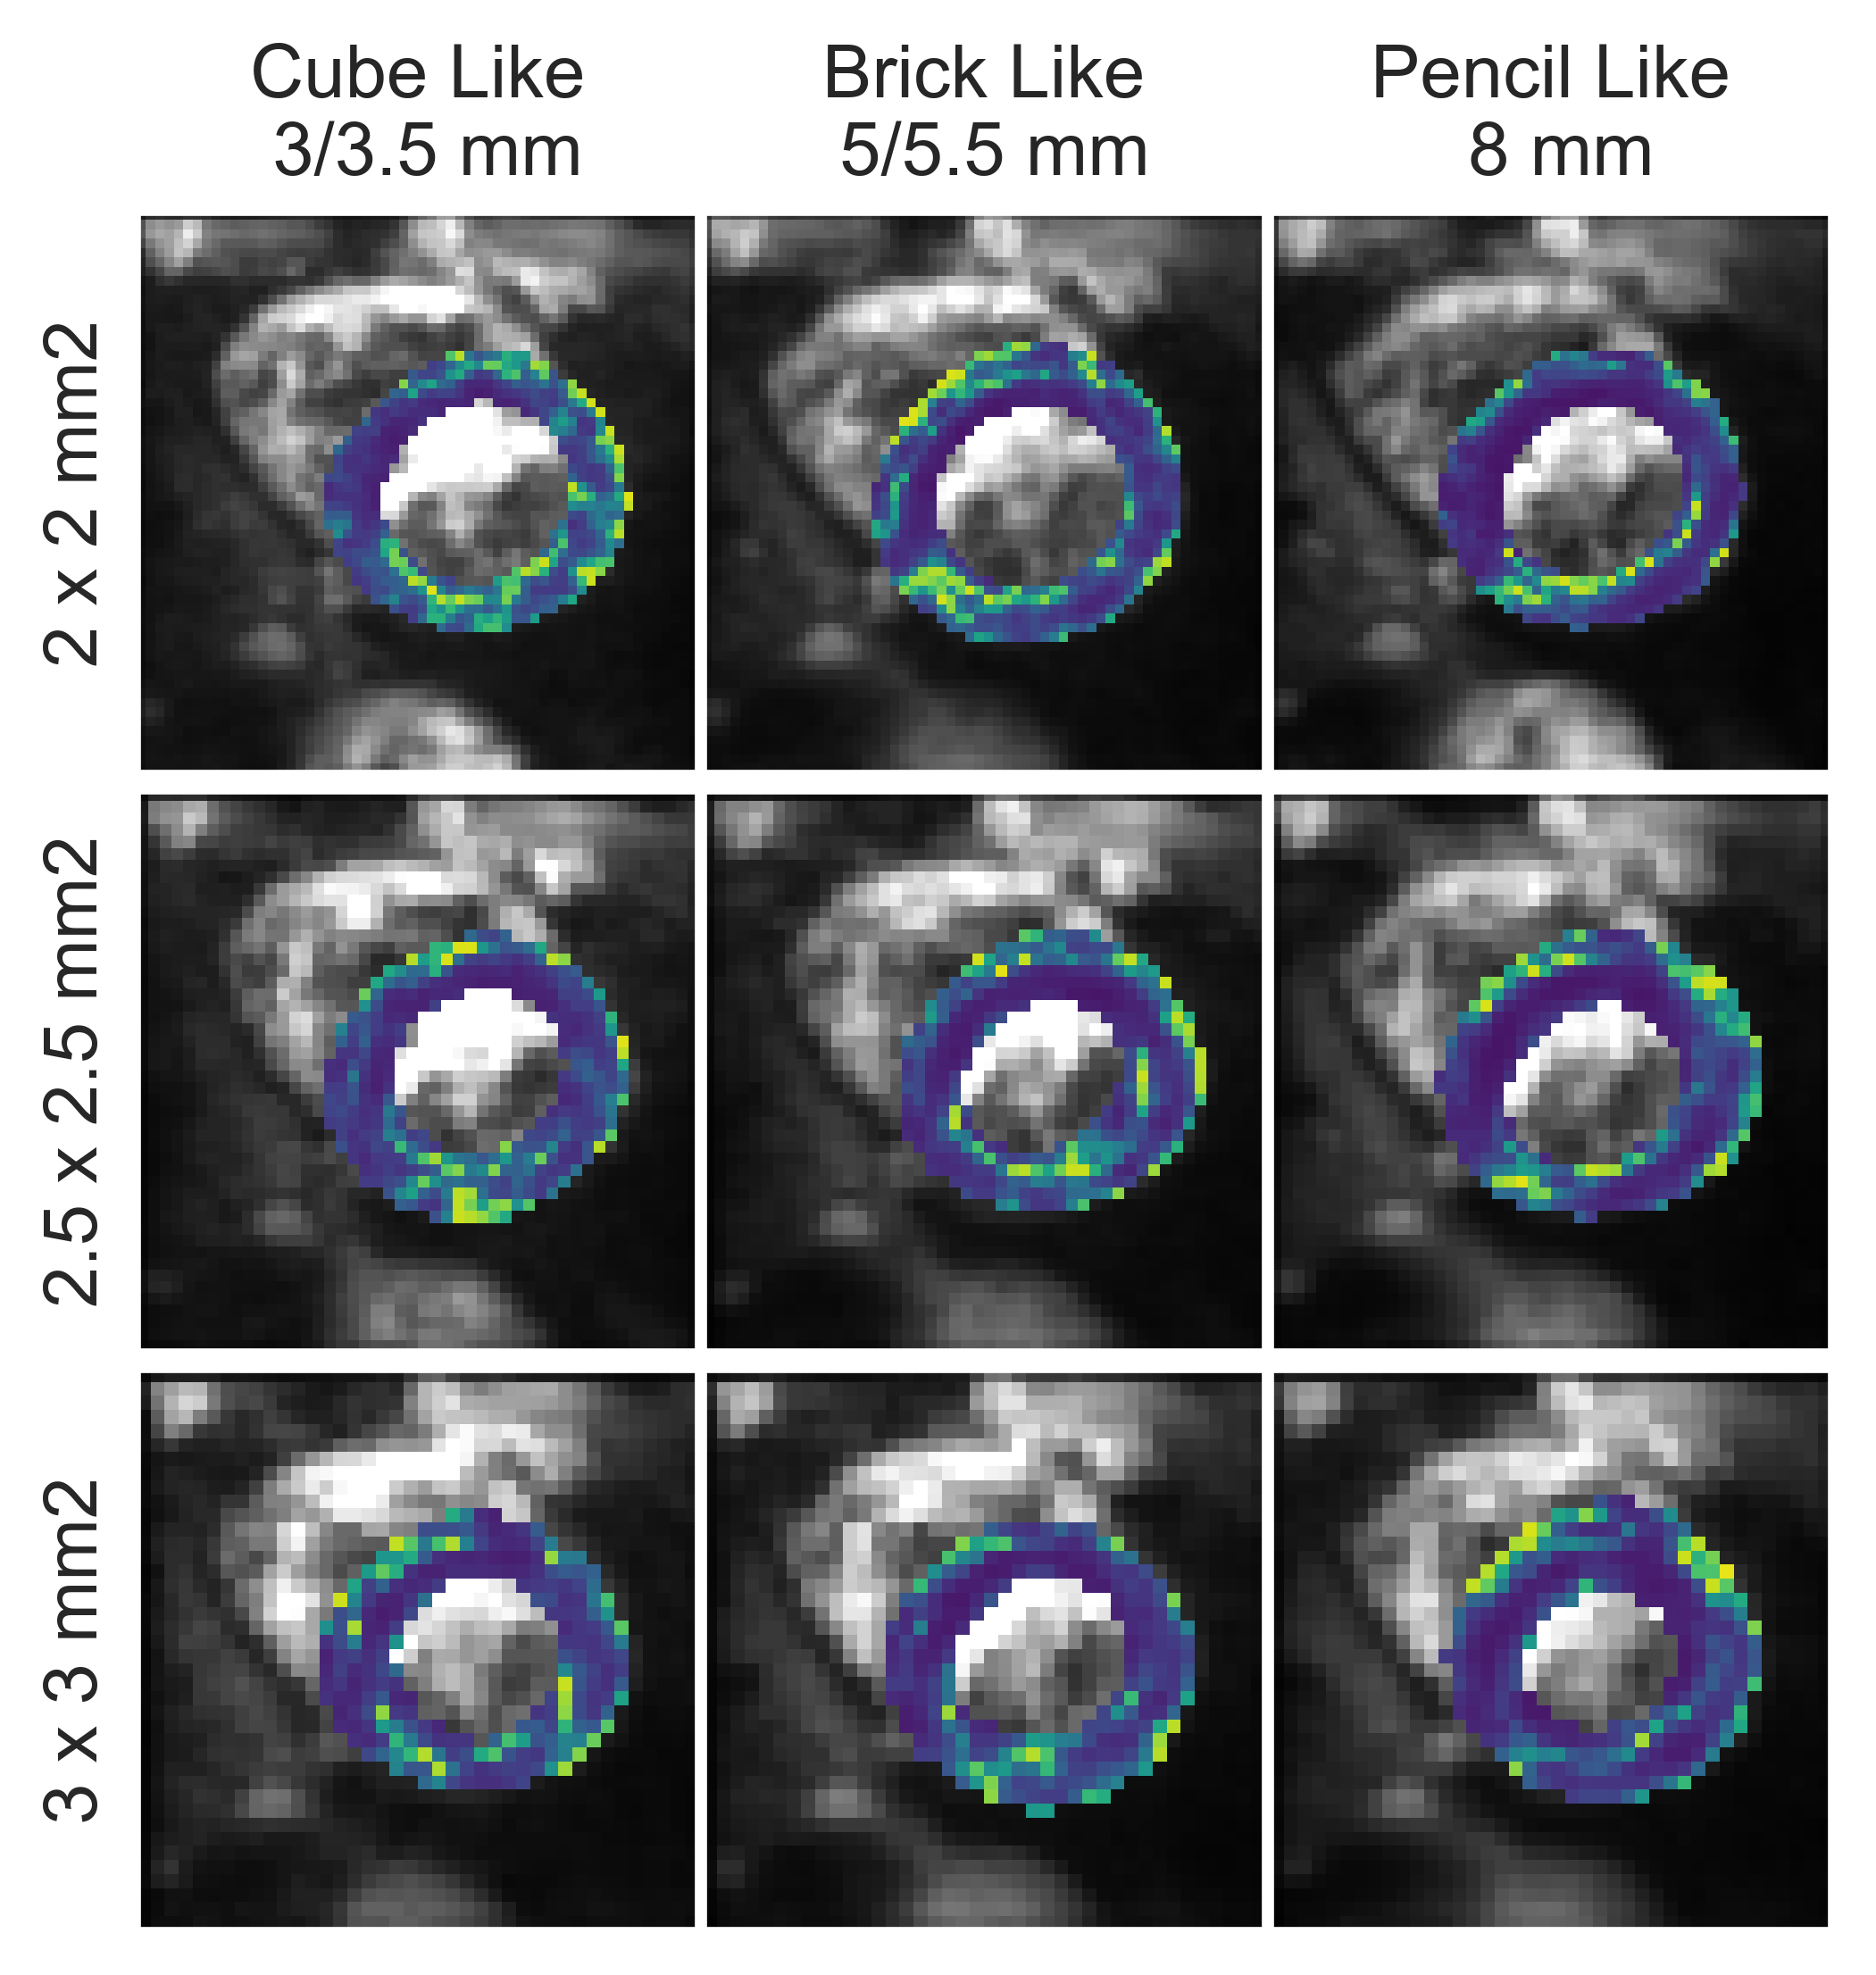

In [221]:
fig, axes = plt.subplots(3, 3, figsize=(5,5),dpi=500)

count = 0
for ii in range(3):
    for jj in range(3):
        ax = axes[ii,jj]
        ax.imshow(ims[count][:,:,0,0],cmap = 'gray',vmin = 0,vmax = 120)
        ax.imshow(maps[count][:,:,0],cmap = 'viridis',vmin = 0,vmax = 90)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.grid(False)

        count +=1
        
plt.subplots_adjust(wspace=-0.05, hspace=0.03)

axes[0,0].set_title('Cube Like\n 3/3.5 mm')
axes[0,1].set_title('Brick Like\n 5/5.5 mm')
axes[0,2].set_title('Pencil Like\n 8 mm')


axes[0,0].set_ylabel('2 x 2 mm2')
axes[1,0].set_ylabel('2.5 x 2.5 mm2')
axes[2,0].set_ylabel('3 x 3 mm2')

fig.savefig('dE1_figure_images.svg', format='svg', bbox_inches='tight')

# Manuscript Figures
These are the figures that are produced in the Manuscript, as shwoing all nine scans together can be challenging to digest the major takeaways: (1) how does the metric change as a function of slice thickness and (b) how does the metric change as a function of voxel shape. The the first we assess differences based on changing slice thickness for a given in-plane resolution. In the latter,  we group the analysis here in terms of the following resolutions:

- Cube Like = 2x2x3,2.5x2.5x3, 3x3x3.5 mm3
- Brick Like = 2x2x5,2.5x2.5x5, 3x3x5.5 mm3
- Pencil Like = 2x2x8,2.5x2.5x8, 3x3x8 mm3

33.58
31.81
25.31
35.46
24.11
24.23
28.01
27.68
32.98
18.35
33.83
vol_2.0res_3.0sl Maximum Liklihood:19.0000
22.4
19.18
23.05
24.0
17.3
19.76
22.94
22.2
20.06
15.39
25.42
vol_2.0res_5.0sl Maximum Liklihood:15.0000
13.54
17.14
17.2
20.27
15.42
13.9
16.28
24.5
16.86
14.25
18.89
vol_2.0res_8.0sl Maximum Liklihood:11.0000
26.63
29.52
26.18
29.56
30.59
19.24
26.15
39.95
24.62
20.37
31.83
vol_2.5res_3.0sl Maximum Liklihood:15.0000
19.95
18.48
19.41
32.45
20.03
19.0
24.03
22.39
18.65
16.8
27.49
vol_2.5res_5.0sl Maximum Liklihood:15.0000
13.52
18.61
18.66
24.66
20.87
16.4
19.64
20.24
14.66
11.58
22.36
vol_2.5res_8.0sl Maximum Liklihood:11.0000
35.67
33.19
28.15
40.79
24.42
17.99
35.43
34.32
26.94
36.15
33.7
vol_3.0res_3.5sl Maximum Liklihood:17.0000
26.46
28.73
29.33
38.38
30.41
17.2
25.05
28.21
18.51
75.38
24.11
vol_3.0res_5.5sl Maximum Liklihood:17.0000
18.55
19.68
24.12
26.66
25.76
15.18
24.34
28.48
20.63
50.61
21.89
vol_3.0res_8.0sl Maximum Liklihood:13.0000


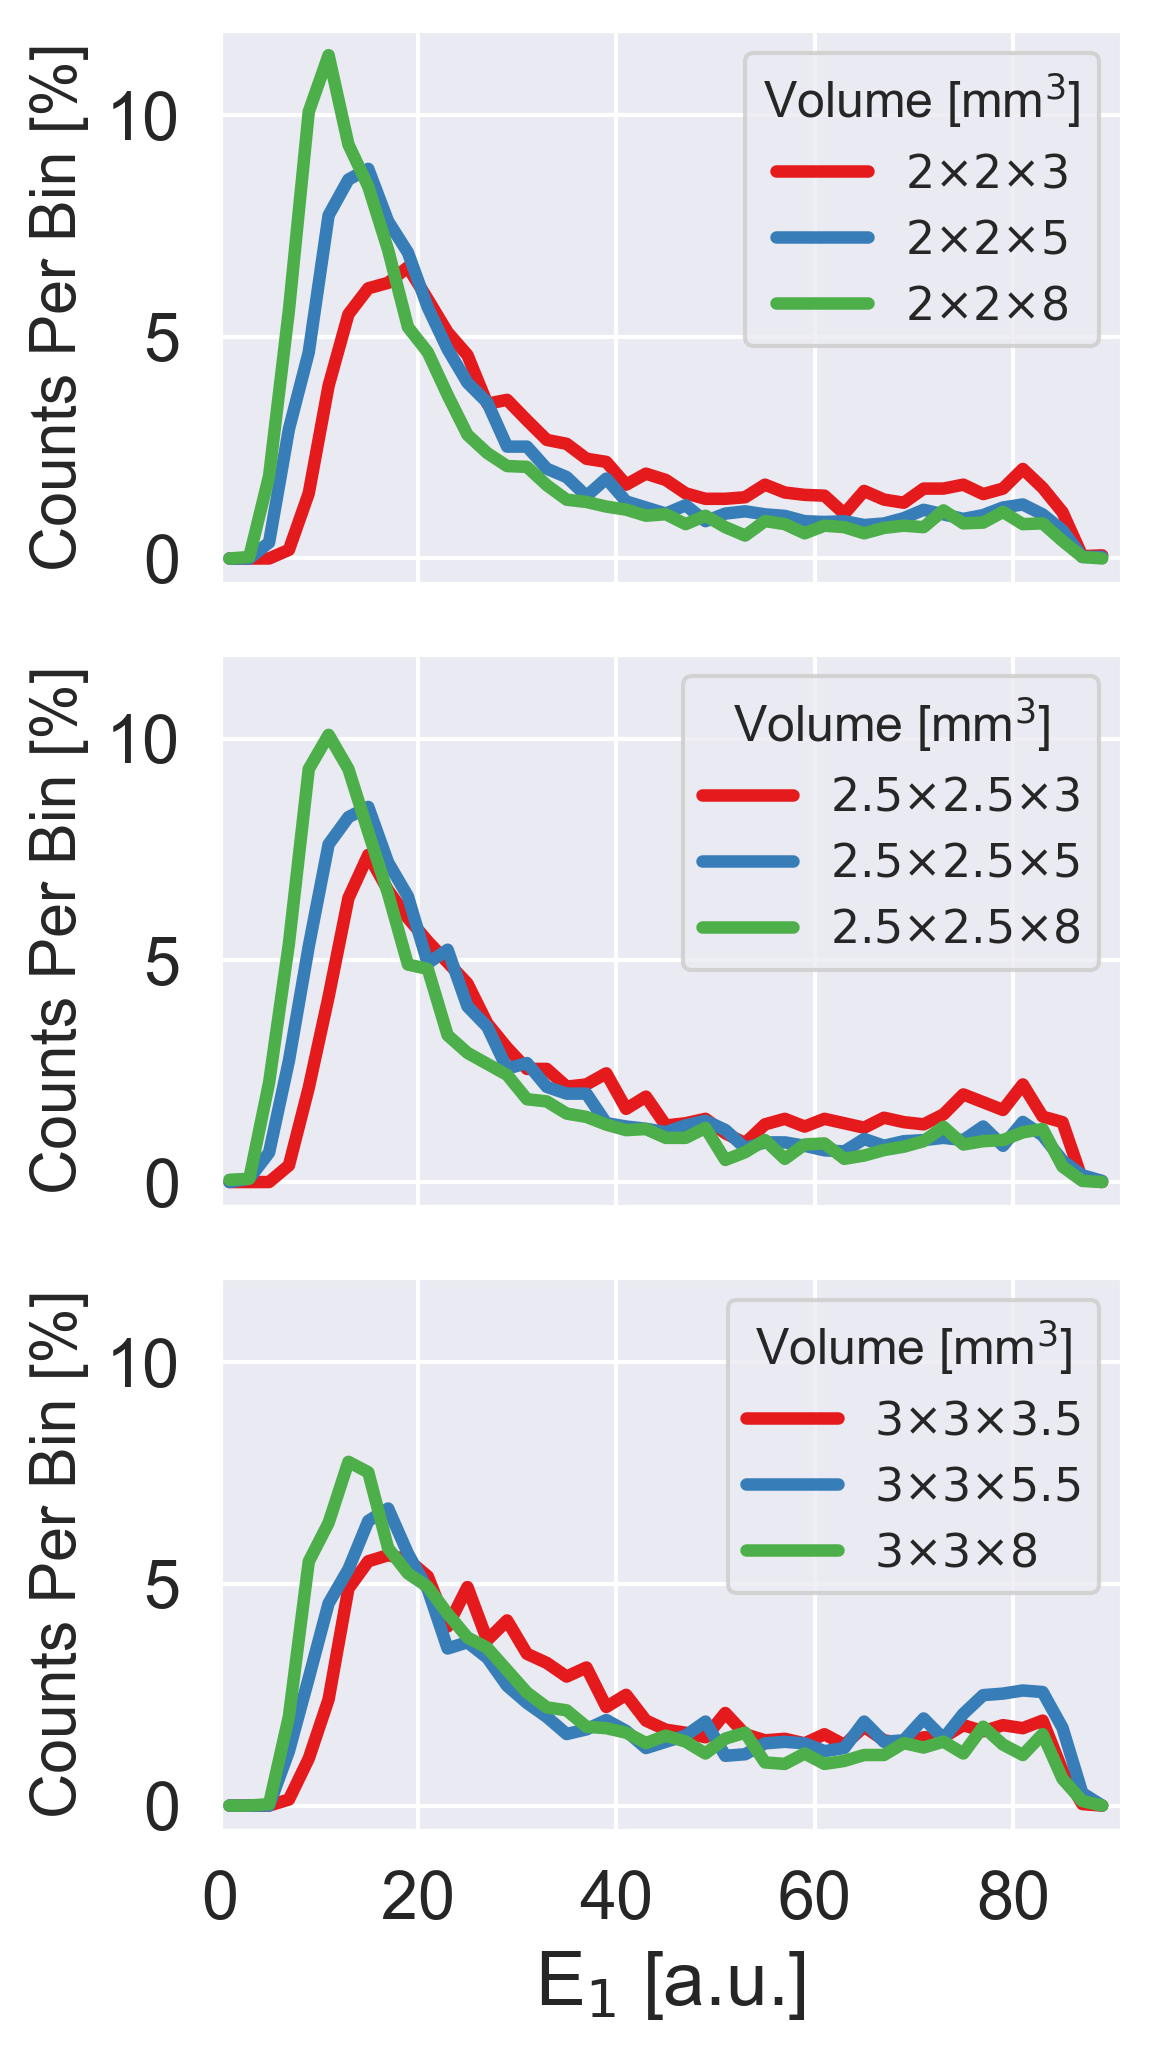

In [222]:
sns.set(style='darkgrid', palette='Set2')
fig, axes = plt.subplots(3, 1, figsize=(4, 7),dpi = 300,sharex = True, sharey=True) 
colors = sns.color_palette('Set1',3)#cmc.roma.colors[::26]
max_likelihood =[]
de1_all = []

plot_ax = [0,0,0,1,1,1,2,2,2]
color_idx = [0,1,2,0,1,2,0,1,2]
label = ['$2×2×3$','$2×2×5$','$2×2×8$','$2.5×2.5×3$','$2.5×2.5×5$','$2.5×2.5×8$','$3×3×3.5$','$3×3×5.5$','$3×3×8$']
for ii in range(9):
    de1 = []
    ims = []
    for vv in range(11):
        main_path = os.path.join(os.path.abspath('../../Data/NifTi/'+vol_idx[vv]) + '/'+ vox_folder[ii] + '/ADC_Filtered')
        path_segmentation = os.path.join(os.path.abspath('../../Data/Segmentations/'+vol_idx[vv]),vox_folder[ii])
        path_maps  = os.path.join(os.path.abspath('../../Data/Uncertainty_Maps/'+vol_idx[vv])+'/'+ vox_folder[ii] )

        NifTi_path = glob.glob(os.path.join(main_path, '*Averaged', '*.nii'))[0]
        header_path              = glob.glob(os.path.join(main_path, '*Averaged', '*.header'))[0]
        b_values_path            = glob.glob(os.path.join(main_path, '*Averaged', '*.bvals'))[0]
        b_vectors_path           = glob.glob(os.path.join(main_path, '*Averaged', '*.bvecs'))[0]


        Seg_path    = os.path.join(path_segmentation)
        Maps_Folder = os.path.join(path_maps)

        
        [data, b_vals_stacked, b_vecs_stacked, Header, _, _] = NifTi_Reader(NifTi_path, b_values_path, b_vectors_path, header_path)
        myo_mask = loadmat(os.path.join(Seg_path,'Interpolated_mask.mat'))['Mask']
        myo_mask = myo_mask.astype('float')
        myo_mask[myo_mask == 0] = np.nan

        dim_x = data.shape[0]
        dim_y = data.shape[1]

        Vector_Uncertainties = loadmat(os.path.join(Maps_Folder, 'Vector_Uncertainties.mat'))
        # FA
        ims.append(np.reshape(np.squeeze(Vector_Uncertainties['dE1']*myo_mask),(dim_x*dim_y)))
        de1.append(np.nanmedian(np.squeeze(Vector_Uncertainties['dE1']*myo_mask)))

        print(np.round(np.nanmedian(Vector_Uncertainties['dE1']*myo_mask),2))

    de1_all.append(de1)
    
    num_bins = np.linspace(0, 90, 46)
    [vals, bin_edges] = np.histogram(ims, bins = num_bins,  range = (0, 90), density = True)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    h = (vals / np.sum(vals)) * 100





    axes[plot_ax[ii]].plot(bin_centers, h,  linewidth = 3,label = label[ii],color = colors[color_idx[ii]])
    axes[plot_ax[ii]].set_ylabel('Counts Per Bin [%]',size = 15)
    axes[2].set_xlabel('E$_1$ [a.u.]',size = 18 )
    max_likelihood.append(bin_centers[np.argmax(h)])
    print(vox_folder[ii], "Maximum Liklihood:{:.4f}".format(bin_centers[np.argmax(h)]))

    
for ii in range(3):
    axes[ii].legend(title='Volume [mm$^3$]')
    axes[ii].set_xticks(np.arange(0, 91, 20))  # Set the locations of xticks
    axes[ii].set_xticklabels([0,20,40,60,80,], fontsize=16)  # Set the labels for xticks
    
    axes[ii].tick_params(axis='both', which='major', labelsize=16)  # Adjust the font size as needed
    axes[ii].set_xlim([0,91])


plt.tight_layout()
fig.savefig('dE1_figure_distribution.svg', format='svg', bbox_inches='tight')


In [223]:
def Bootstrap_95_CI(data):
    data = np.array(data)
    N = data.shape[0]
    Nbs = 1000

    np.random.seed(0)
    bs_idx = np.random.randint(0, N, (N, Nbs))
    bs = data[bs_idx]

    lower_bound = np.percentile(bs, 2.5, axis=0).mean()
    upper_bound = np.percentile(bs, 97.5, axis=0).mean()
    CI_low = lower_bound
    CI_high = upper_bound
    return [CI_low, CI_high]


print(np.array(de1_all).shape)
primary_eigenvector = np.array(de1_all).T
lb = []
ub =  []
for ii in range(9):
    lb_tmp,ub_tmp  = Bootstrap_95_CI(primary_eigenvector[:,ii])   
    lb.append(lb_tmp)
    ub.append(ub_tmp)

np.nanmedian(primary_eigenvector,axis = 0)

(9, 11)


array([28.00803497, 22.20036894, 16.85509577, 26.63418308, 19.95309301,
       18.65667809, 33.70301857, 28.21104007, 24.11838141])

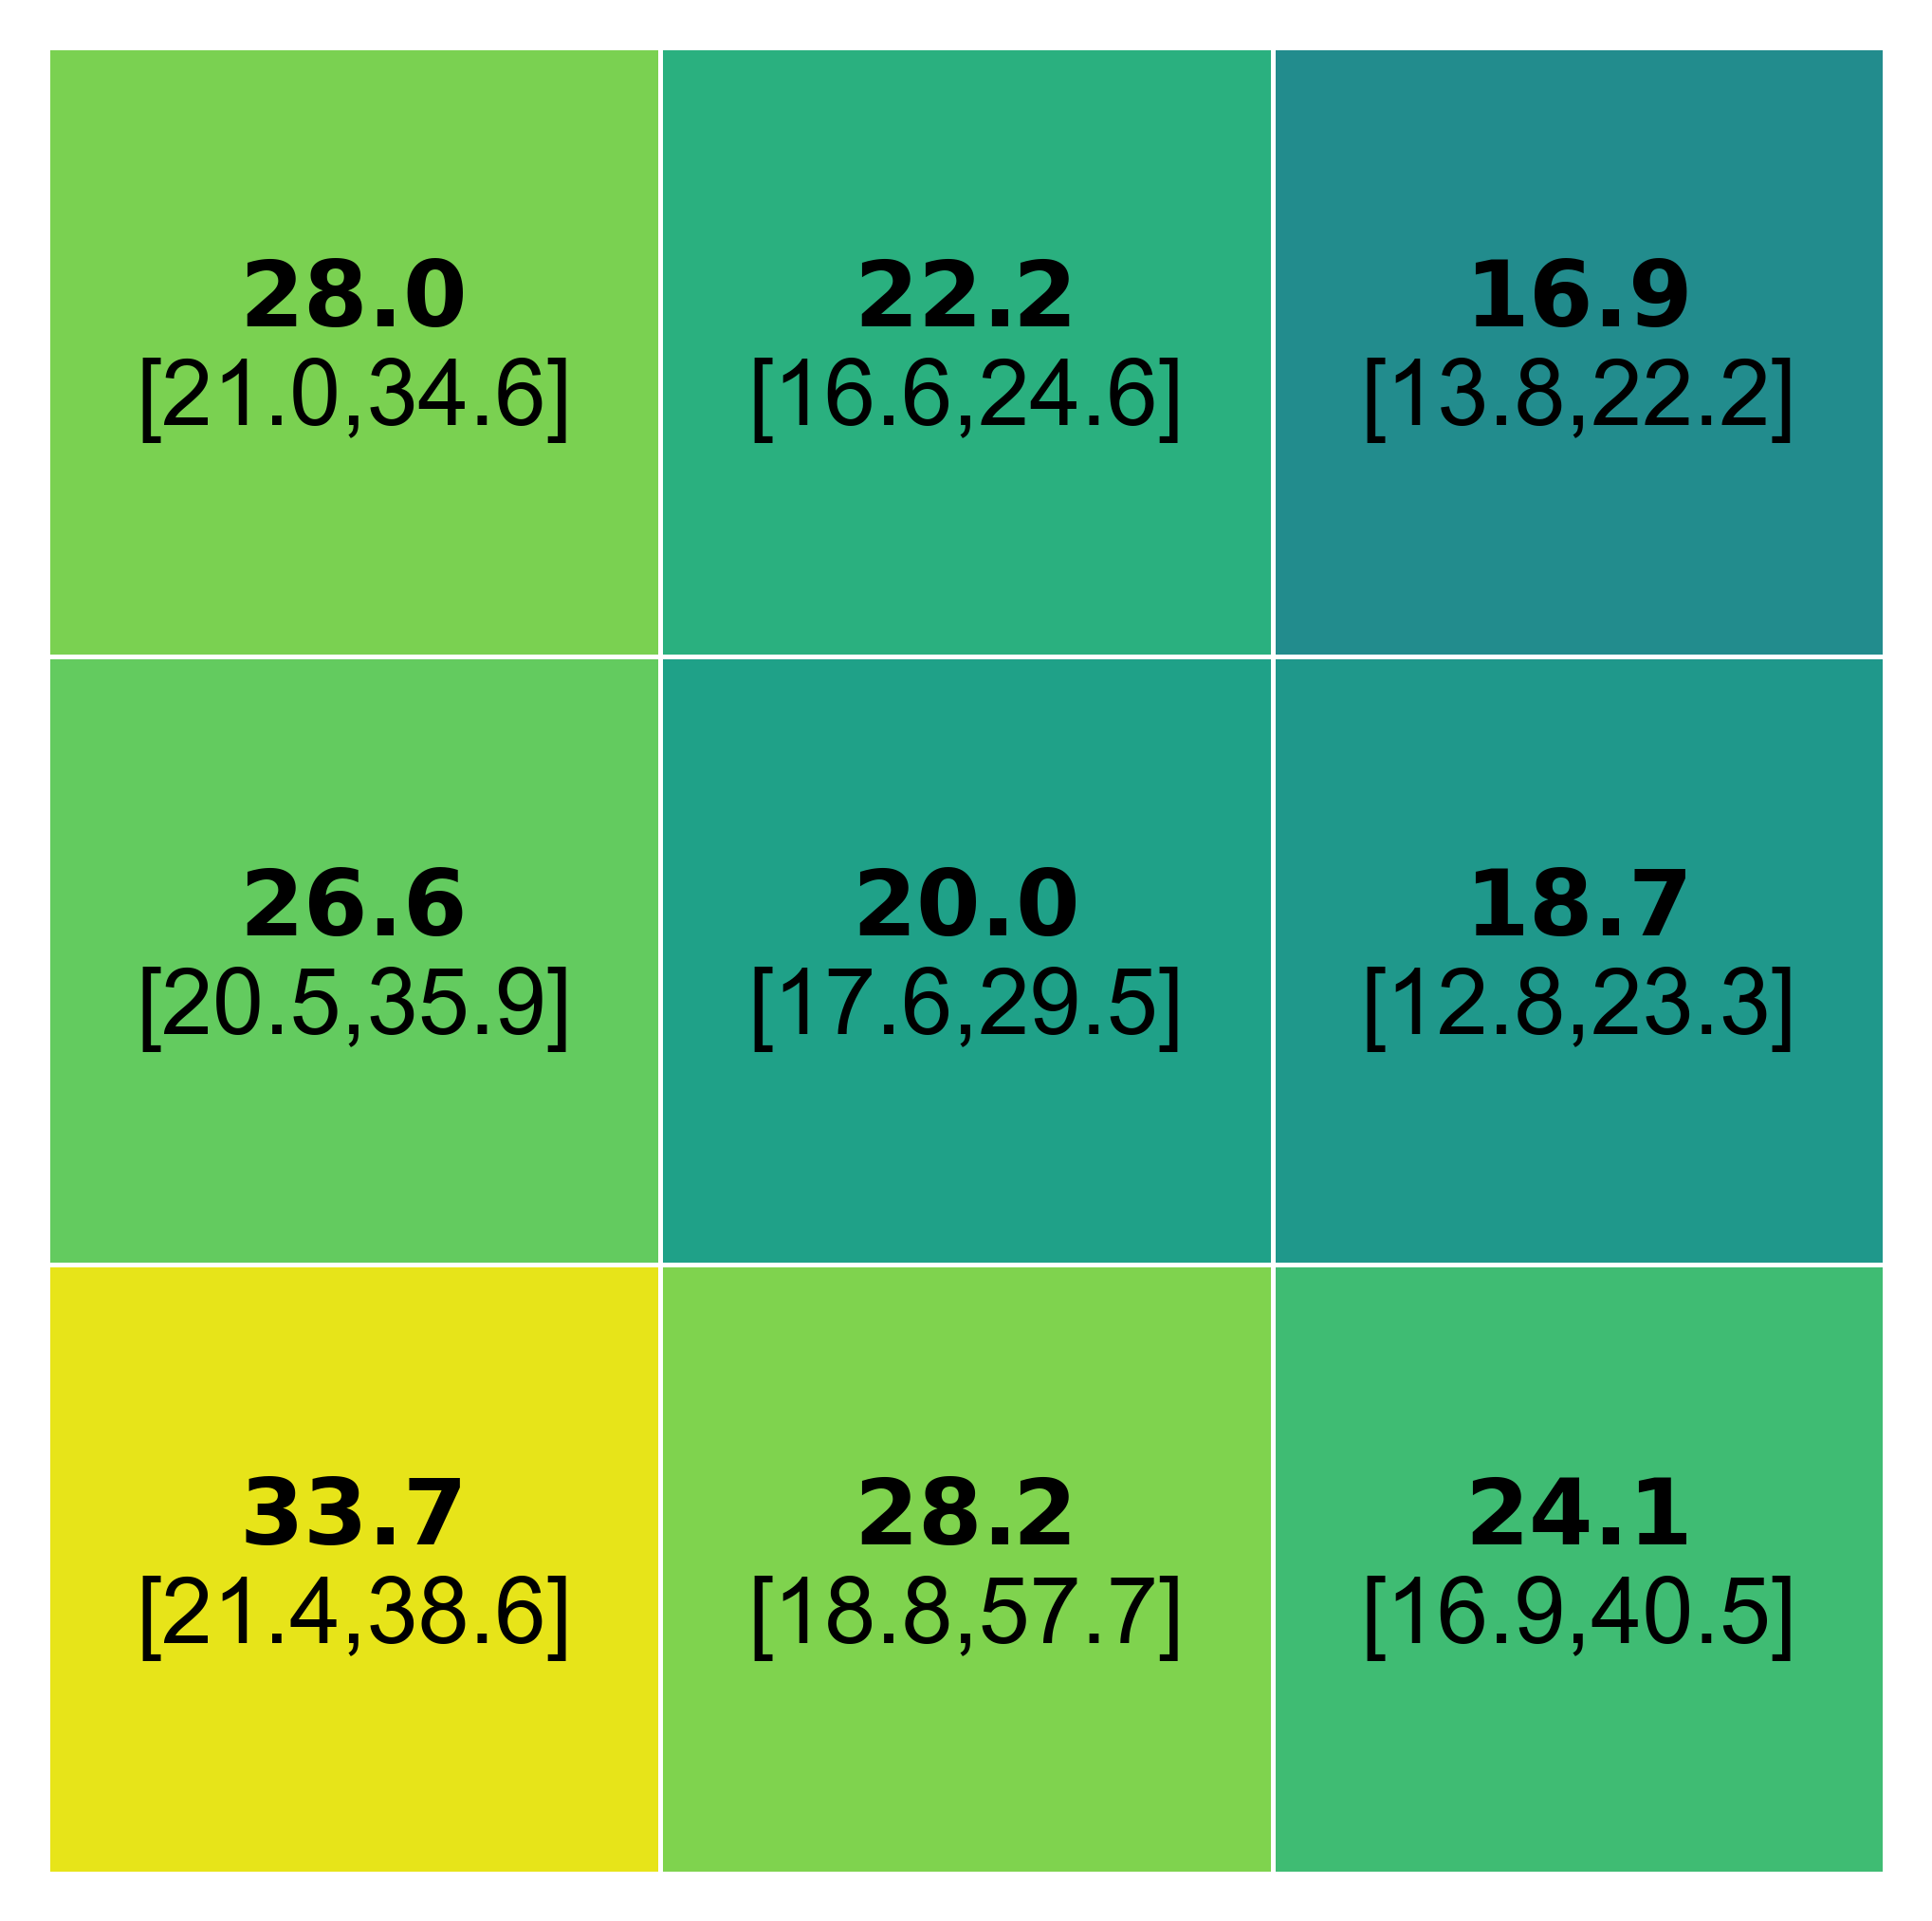

In [224]:
median_primary_eigenvector = np.nanmedian(primary_eigenvector,axis = 0)

median_primary_eigenvector_map = [median_primary_eigenvector[:3],median_primary_eigenvector[3:6],median_primary_eigenvector[6:]]


formatted_text = (np.asarray([" $\\mathbf{{ {:.1f} }}$  \n[{:.1f},{:.1f}]".format( 
    data, lower,upper) for  data, lower,upper in zip(np.array(median_primary_eigenvector).flatten(), np.array(lb).flatten(),np.array(ub).flatten(),)]) ).reshape(3, 3) 


fig, axes = plt.subplots(1, 1, figsize=(5,5),sharex=True,sharey = True,dpi=500)
ax = sns.heatmap(median_primary_eigenvector_map,annot=formatted_text,linewidth=.5,fmt="",annot_kws={"fontsize":14,"color":'black'},
            cmap = 'viridis',cbar = False,vmin = 0,vmax = 35)

axes.set_yticklabels(['', '', ''],size = 0,color='white')
axes.set_xticklabels(['', '', ''],size = 0,color='white')


fig.savefig('dE1_figure_heatmap.svg', format='svg', bbox_inches='tight')




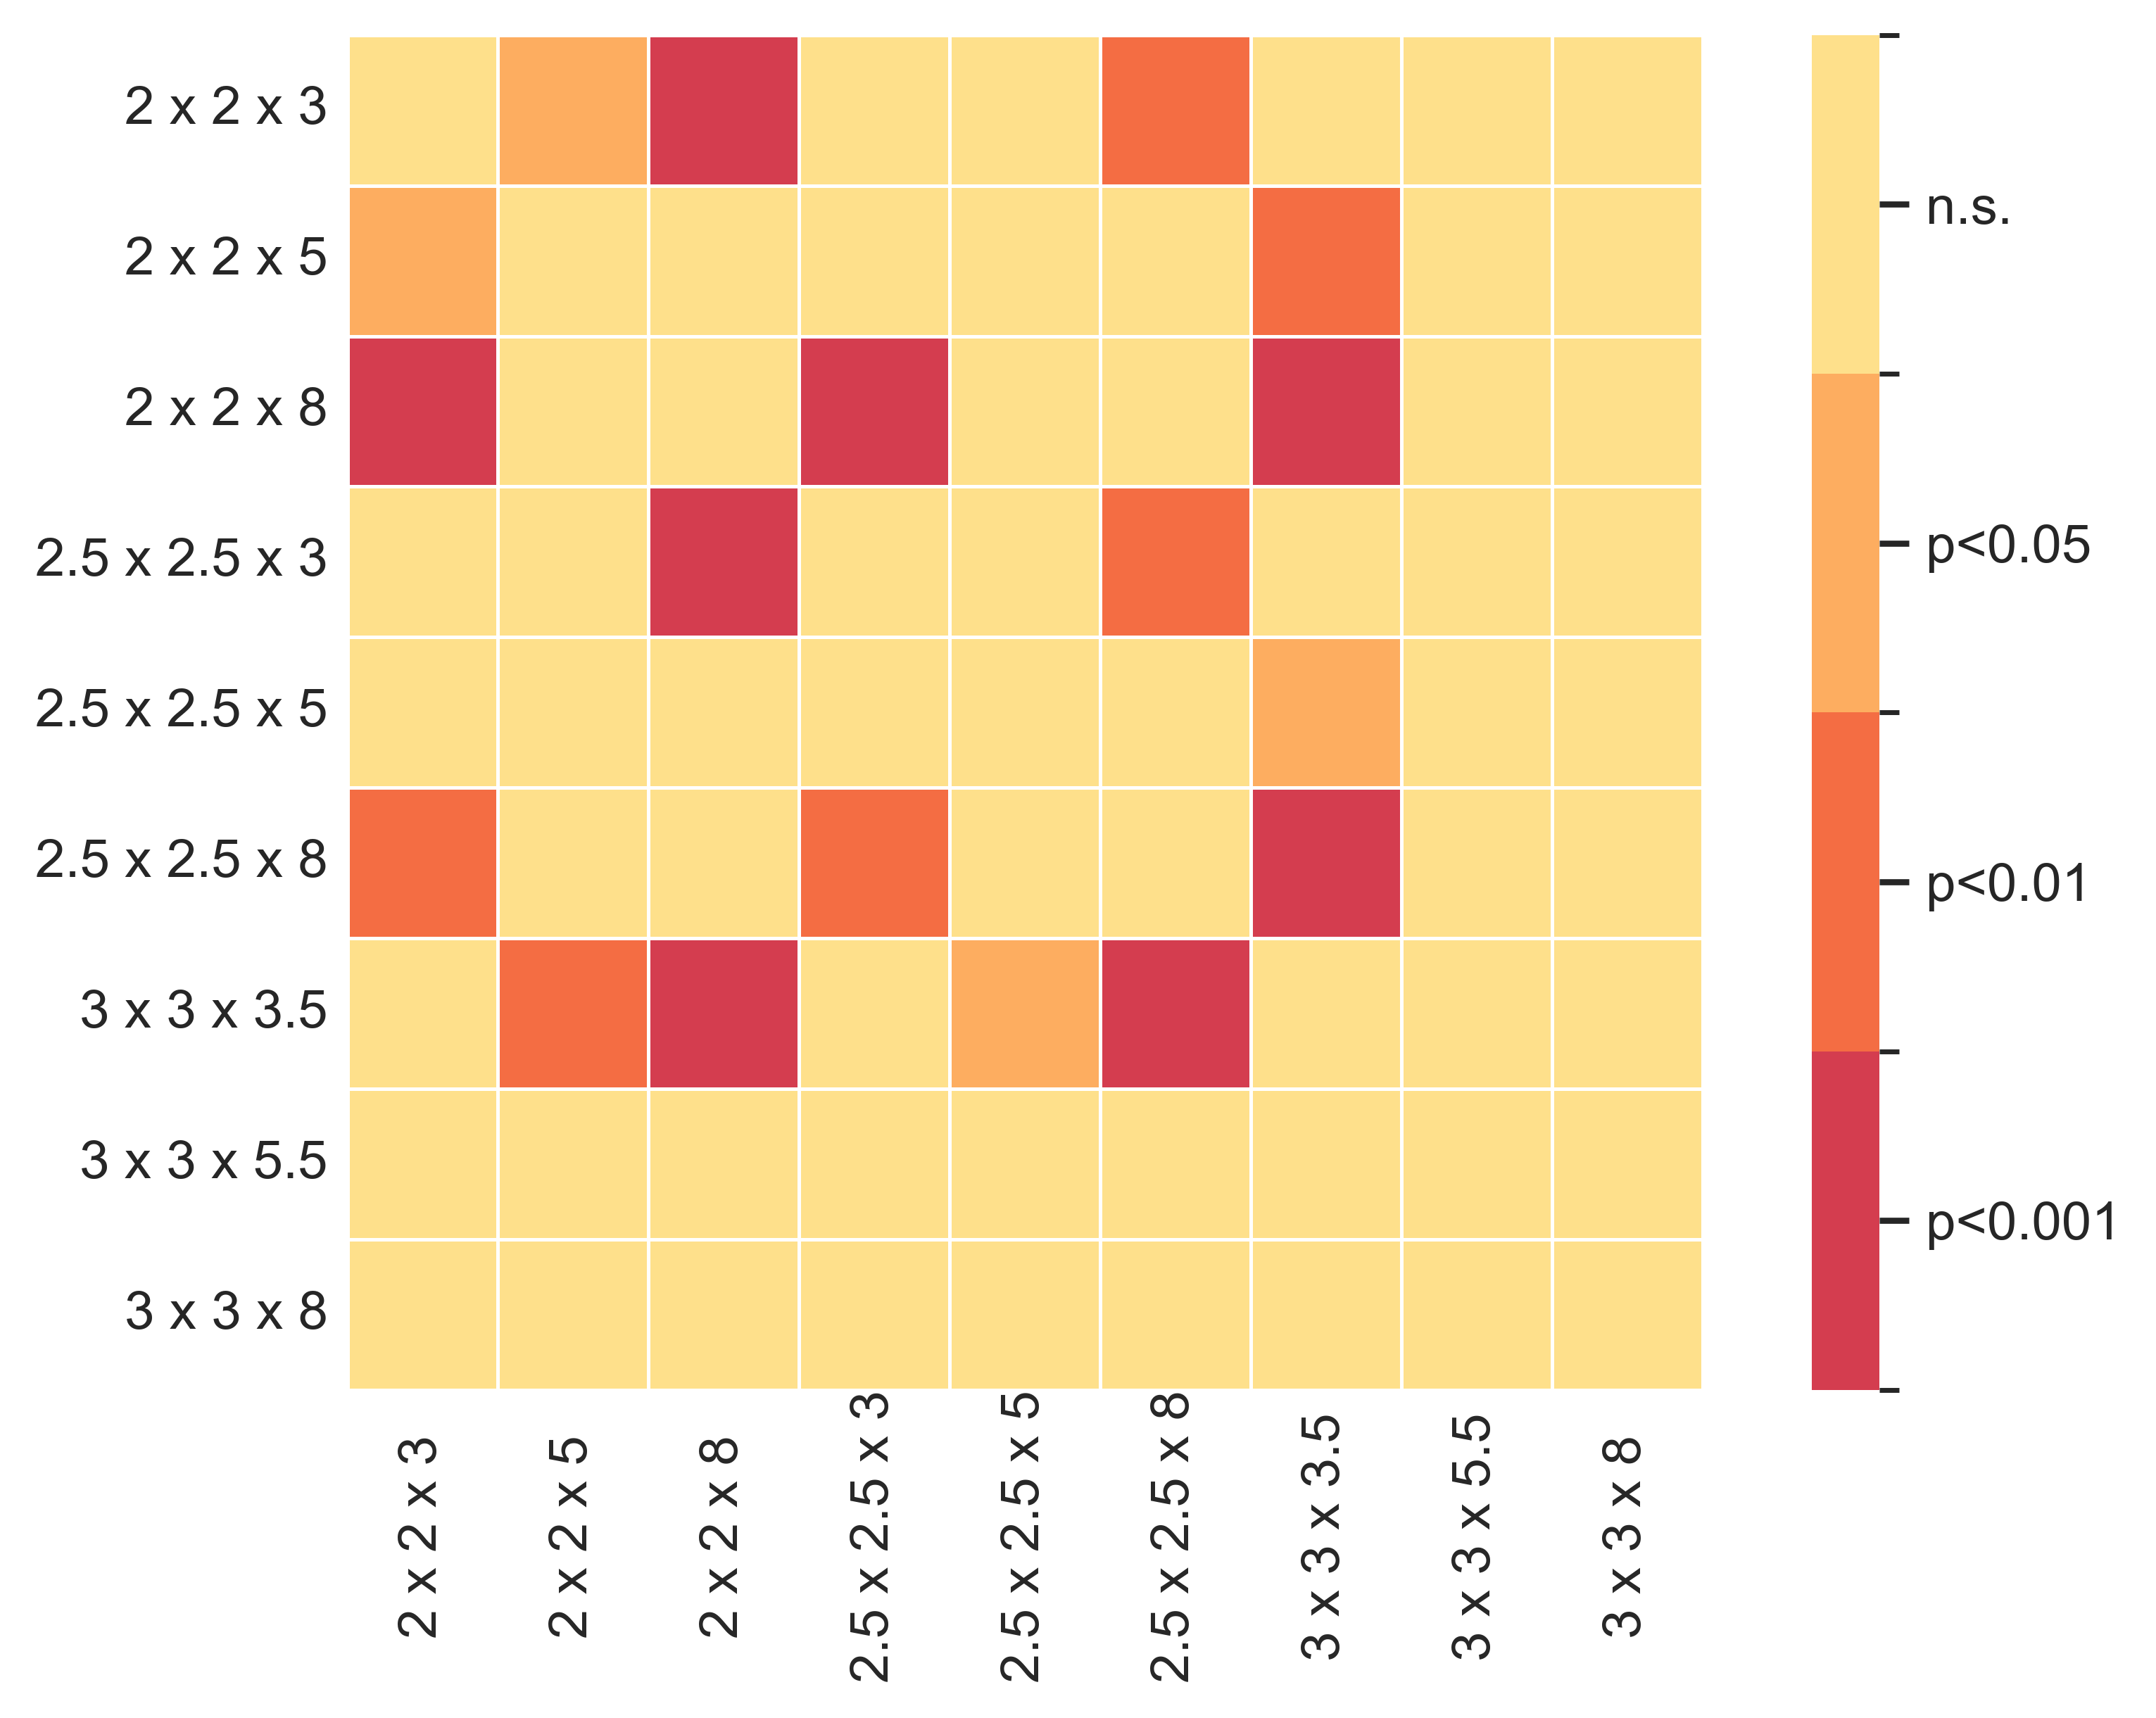

In [225]:
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
alpha= 0.05

hypothesis = np.zeros((9,9))
hypothesis[:] = np.nan


normal = 0
for ii in range(primary_eigenvector.shape[-1]):
    normal +=stats.shapiro(primary_eigenvector[:,ii])[0] >alpha #Normal is greater than alpha


if normal <primary_eigenvector.shape[-1]: # Non-normal distribution
    result = stats.friedmanchisquare(primary_eigenvector[:,0],primary_eigenvector[:,1],primary_eigenvector[:,2],primary_eigenvector[:,3],primary_eigenvector[:,4],primary_eigenvector[:,5],primary_eigenvector[:,6],primary_eigenvector[:,7],primary_eigenvector[:,8])
    if result[1] < alpha:
        test = sp.posthoc_wilcoxon(primary_eigenvector.T,p_adjust = 'holm-sidak')
        hypothesis = test
    else:
        hypothesis = np.nan

elif normal ==primary_eigenvector.shape[-1]: # normal distribution data 
    result = stats.f_oneway(primary_eigenvector[:,0],primary_eigenvector[:,1],primary_eigenvector[:,2],primary_eigenvector[:,3],primary_eigenvector[:,4],primary_eigenvector[:,5],primary_eigenvector[:,6],primary_eigenvector[:,7],primary_eigenvector[:,8])
    if result[1] < alpha:
        test = sp.posthoc_ttest(primary_eigenvector.T,p_adjust = 'holm-sidak')
        hypothesis = test 
    else:
        hypothesis = np.nan



from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np

labels = ["2 x 2 x 3","2 x 2 x 5","2 x 2 x 8",
        "2.5 x 2.5 x 3","2.5 x 2.5 x 5","2.5 x 2.5 x 8",
        "3 x 3 x 3.5","3 x 3 x 5.5","3 x 3 x 8",
        ]


my_colors = [sns.color_palette("Spectral",9)[0], sns.color_palette("Spectral",9)[1], sns.color_palette("Spectral",9)[2], 
            sns.color_palette("Spectral",9)[3]]
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.001, 0.01, 0.05,1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

fig, axes = plt.subplots(1, 1, figsize=(8,5),sharex=True,sharey = True,dpi=500)
count = 2

mask =  np.tri(hypothesis.shape[0], k=-1)
mask[mask==0] = np.nan
A = hypothesis

ax = sns.heatmap(A,annot = False, linewidth=.5,
            norm=my_norm,cmap = my_cmap,cbar = True,annot_kws={"fontsize":8}, xticklabels=labels, yticklabels=labels,square = True)
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([(0 + 0.001)/2,(0.001+0.01)/2,(0.01+0.05)/2,(0.05+1)/2])
c_bar.set_ticklabels(['p<0.001','p<0.01','p<0.05','n.s.'])  
c_bar.set_ticklabels(['p<0.001','p<0.01','p<0.05','n.s.'])  
ax.set_xticklabels(ax.get_xticklabels(),  ha="center", va="center", position=(0, 0))
ax.tick_params(axis='x', which='major', pad=24)  # Adjust the pad value as needed
ax.tick_params(axis='y', which='major', pad=-2)  # Adjust the pad value as needed


count = count -1

plt.subplots_adjust(wspace=0.05, hspace=0.03)


fig.savefig('mFA_figure_statistics.svg', format='svg', bbox_inches='tight')

# AHA

In [226]:
import matplotlib as mpl
def bullseye_plot(ax, data, seg_bold=None, cmap="viridis", norm=None):
    """
    Bullseye representation for the left ventricle. This is adapted from: https://matplotlib.org/stable/gallery/specialty_plots/leftventricle_bullseye.html
    Bullseye Plot will only show the mid-ventricular segments  only
    Parameters
    ----------
    ax : axes
    data : list[float]
        The intensity values for each of the 17 segments.
    seg_bold : list[int], optional
        A list with the segments to highlight.
    cmap : colormap, default: "viridis"
        Colormap for the data.
    norm : Normalize or None, optional
        Normalizer for the data.

    Notes
    -----
    This function creates the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """

    data = np.ravel(data)
    if seg_bold is None:
        seg_bold = []
    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())
    
    r = np.linspace(0.2, 1, 4)
    ax.set(ylim=[0, 1], xticklabels=[], yticklabels=[])
    ax.grid(False)  # Remove grid
    # Fill segments 1-6, 7-12, 13-16.
    for start, stop, r_in, r_out in [
            
            (6, 12, r[1], r[2]),
            
    ]:
        n = stop - start
        dtheta = 2*np.pi / n
        ax.bar(np.arange(n) * dtheta + np.pi/2, r_out - r_in, dtheta, r_in,
               color=cmap(norm(data[start:stop])))


        count = 0
        rotation = [0,60, -60,0,60,-60]
        position = [0.58,0.58,0.61,0.58,0.58,0.56]
        # Add labels to each segment
        for i in range(start, stop):
            theta_i = i * dtheta + (np.pi/6 + np.pi/2)/2
            theta_i_plus_one = (i + 1) * dtheta + (np.pi/6 + np.pi/2)/2
            theta_center = (theta_i + theta_i_plus_one) / 2
            r_center = (r_in + r_out) / 2


            #ax.text(theta_center, r_center, str(i + 1), ha='center', va='center')
            label = np.round(data[i],1)
            ax.text(theta_center, position[count], label, ha='center', va='center',rotation = rotation[count],size = 12)
            count +=1


    # Now, draw the segment borders.  In order for the outer bold borders not
    # to be covered by inner segments, the borders are all drawn separately
    # after the segments have all been filled.  We also disable clipping, which
    # would otherwise affect the outermost segment edges.
    # Draw edges of segments 1-6, 7-12, 13-16.
    for start, stop, r_in, r_out in [
            (6, 12, r[1], r[2]),
    ]:
        n = stop - start
        dtheta = 2*np.pi / n
        ax.bar(np.arange(n) * dtheta + np.pi/2, r_out - r_in, dtheta, r_in,
               clip_on=False, color="none", edgecolor="k", linewidth=[
                   4 if i + 1 in seg_bold else 2 for i in range(start, stop)])
    


In [227]:
colors = sns.color_palette('husl',9)
segment_mean= []
for ii in range(9):
    vol_list = []
    for vv in range(11):
        main_path = os.path.join(os.path.abspath('../../Data/NifTi/'+vol_idx[vv]) + '/'+ vox_folder[ii] + '/ADC_Filtered')
        path_segmentation = os.path.join(os.path.abspath('../../Data/Segmentations/'+vol_idx[vv]),vox_folder[ii])
        path_maps  = os.path.join(os.path.abspath('../../Data/Uncertainty_Maps/'+vol_idx[vv])+'/'+ vox_folder[ii] )

        NifTi_path = glob.glob(os.path.join(main_path, '*Averaged', '*.nii'))[0]
        header_path              = glob.glob(os.path.join(main_path, '*Averaged', '*.header'))[0]
        b_values_path            = glob.glob(os.path.join(main_path, '*Averaged', '*.bvals'))[0]
        b_vectors_path           = glob.glob(os.path.join(main_path, '*Averaged', '*.bvecs'))[0]


        Seg_path    = os.path.join(path_segmentation)
        Maps_Folder = os.path.join(path_maps)

        
        [data, b_vals_stacked, b_vecs_stacked, Header, _, _] = NifTi_Reader(NifTi_path, b_values_path, b_vectors_path, header_path)
        myo_mask = loadmat(os.path.join(Seg_path,'AHA_mask.mat'))['AHA']
        myo_mask = myo_mask.astype('float')
        myo_mask[myo_mask == 0] = np.nan

        Invariant_Uncertainties = loadmat(os.path.join(Maps_Folder, 'Vector_Uncertainties.mat'))
        data = Invariant_Uncertainties['dE1']

        aha = []

        labels = np.unique(myo_mask)
        for label in labels:
            if label != np.nan:
                roi_data = np.zeros_like(data)
                roi_data[myo_mask == label] = data[myo_mask == label]
                roi_data[roi_data ==0] = np.nan

                aha.append(np.nanmedian(roi_data))

        vol_list.append(aha)
    
    segment_mean.append(vol_list)

segment_avg_array = np.array(segment_mean)
segment_group_med = np.nanmedian(segment_avg_array,axis = 1)

/opt/anaconda3/envs/CarDpy/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [228]:
med_FA = np.nanmedian(np.array(de1_all),axis = 1)
med_FA.shape, segment_avg_array.shape, segment_group_med.shape

((9,), (9, 11, 7), (9, 7))

In [229]:
import seaborn as sns

import scikit_posthocs as sp
from scipy import stats
from statsmodels.stats.multitest import multipletests


alpha =  0.05 / 6 # DO WE NEED BONFERONNI CORRECTION


seg_pvalue = []
seg_idx = []
for vox in range(9):
    alpha= 0.05
    
    hypothesis = []

    for aha in range(6):
        normal = 0
        FA = segment_avg_array[vox,:,aha]
        med = [med_FA[vox]]*11
        result = stats.ttest_ind(np.array(FA),  np.array(med)) [1]
        hypothesis.append(result)
        #print( med_MD[vox], np.round(result.pvalue,3),MD)
    #reject, hypothesis_corrected, _, _ = multipletests(hypothesis, alpha=alpha, method='holm-sidak')
    #print(hypothesis)
    seg_pvalue.append(hypothesis)
    significant_indices = [idx+7 for idx, p in enumerate(hypothesis) if p < 0.05 / 6 ]
    print('Hypthesis results for voxel:',vox_folder[vox],  hypothesis,significant_indices)
    seg_idx.append(significant_indices)
    #print(np.round(hypothesis,2),significant_indices, segment_group_med[vox,:-1])


print(significant_indices)

Hypthesis results for voxel: vol_2.0res_3.0sl [0.6007661983824499, 0.004107128566591102, 0.2119192307678087, 0.43358146608745785, 0.002196905608045792, 0.05596385274460732] [8, 11]
Hypthesis results for voxel: vol_2.0res_5.0sl [0.013207206385856603, 1.664710796105425e-05, 0.002695763576877425, 0.17781682280663272, 0.027708012150239488, 0.08288758627225146] [8, 9]
Hypthesis results for voxel: vol_2.0res_8.0sl [0.13424580435434016, 0.0005496350917736645, 0.03388641273805816, 0.14660535503074978, 0.019841080796861123, 0.0023642427412406334] [8, 12]
Hypthesis results for voxel: vol_2.5res_3.0sl [0.04458213791862174, 0.5947157717306171, 0.6087193152292936, 0.8487532020363289, 0.004374791534951465, 0.04402850085853874] [11]
Hypthesis results for voxel: vol_2.5res_5.0sl [0.7761267112328493, 0.08900544619981346, 0.3672769265605741, 0.3343172744580909, 0.013617959808521348, 0.04040048880858791] []
Hypthesis results for voxel: vol_2.5res_8.0sl [0.7331456943894663, 0.413573626644284, 0.1983667042

/var/folders/mb/68q17fnn0sbfmdht6h_p8mlw0000gn/T/ipykernel_5447/2490332610.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = stats.ttest_ind(np.array(FA),  np.array(med)) [1]


In [230]:
med_FA

array([28.00803497, 22.20036894, 16.85509577, 26.63418308, 19.95309301,
       18.65667809, 33.70301857, 28.21104007, 24.11838141])

/var/folders/mb/68q17fnn0sbfmdht6h_p8mlw0000gn/T/ipykernel_5447/122338650.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Get cividis colormap


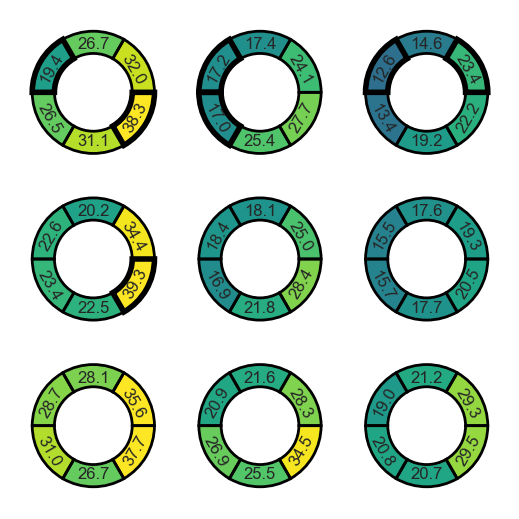

In [231]:
from matplotlib import cm


from matplotlib import cm

sns.set_style("white") 
sns.set_style(style=None, rc=None) 
fig = plt.figure(figsize=(5, 5), layout="constrained",dpi=100)
fig.get_layout_engine().set(wspace=-5, w_pad=-5, hspace=-5, h_pad=-5)
axs = fig.subplots(3, 3, subplot_kw=dict(projection='polar'))
cmap = cm.get_cmap('viridis')  # Get cividis colormap
norm = mpl.colors.Normalize(vmin=0, vmax=35)
# Create an empty ScalarMappable to set the colorbar's colormap and norm.
# The following gives a basic continuous colorbar with ticks and labels.

count = 0
for ii in range(3):
    for jj in range(3):
        plot_values = np.concatenate(([np.nan]*6,segment_group_med[count,:]))
        bold = seg_idx[count]
        
        #plot_values = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0.5,1,1.5,2,2.5,3,3.5]
        bullseye_plot(axs[ii,jj], plot_values, cmap=cmap, norm=norm,seg_bold = bold,)
        count +=1
        axs[ii,jj].spines['polar'].set_visible(False)
        

fig.savefig('dE1_figure_aha_segments.svg', format='svg', bbox_inches='tight')




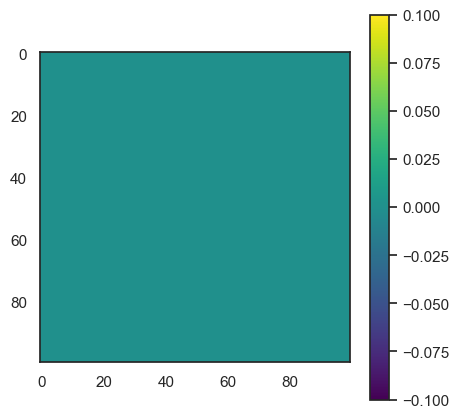

In [232]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(np.zeros((100,100)),cmap = 'viridis')
plt.colorbar()
fig.savefig('cmap.svg')

In [233]:
np.nanmedian([22.4,
19.18,
23.05,
24.0,
17.3,
19.76,
22.94,
22.2,
20.06,
15.39,
25.42])

22.2